Complete the following sections and execute your code. Do not clear the output but save the file and upload where requested in the assessment

In [ ]:
# Load your dataset file here and read the contents into a pandas dataframe
import pandas as pd

df = pd.read_csv('asg_dataset.csv')

# display the dataframe
print(df)

                         id  created_at             user  \
0       1386694264550270000  2021-04-26  jfd4humanrights   
1       1386694260213170000  2021-04-26      andgrateful   
2       1386694256413320000  2021-04-26       jlreader8B   
3       1386694252017630000  2021-04-26    ijennychauhan   
4       1386694248284700000  2021-04-26      IJNSJournal   
...                     ...         ...              ...   
147476  1409140000000000000  2021-06-27   jmhamiltonblog   
147477  1409140000000000000  2021-06-27       CochingcoA   
147478  1409130000000000000  2021-06-27  DavidGr07837209   
147479  1409130000000000000  2021-06-27         JOBBWIRE   
147480  1409130000000000000  2021-06-27     Life_Devotee   

                                                     text lang  \
0       RT @VP: The U.S. is working closely with the I...   en   
1       RT @JackPosobiec: Flip-Flop Fauci admits outdo...   en   
2       RT @timmy315: Hi Twitter, I’m Tim Manning, the...   en   
3       RT @its

In [ ]:
# Identify the number of tweets recorded in the dataset as reported by the dataframe properties
num_tweets = df.shape[0]

# print the number of tweets
print("Number of Tweets:", num_tweets)

Number of Tweets: 147481


In [ ]:
# Identify the number of duplicate entries in the dataset and remove them
num_duplicates = df.duplicated().sum()

# display the number of duplicate entries
print("Number of duplicated entries:", num_duplicates)

# remove duplicated entries
df = df.drop_duplicates()

Number of duplicated entries: 6


In [ ]:
# How many days were recorded in your dataset. Show the different dates that were collected (cleaning up and removing bad entries where necessary)

# convert the date column to datetime format
df['created_at'] = pd.to_datetime(df['created_at'])

# remove null values in the 'created_at' column
df = df.dropna(subset=['created_at'])

# check the range of dates and caldulate the number of unique dates
start_date = df['created_at'].min().date()
end_date = df['created_at'].max().date()
unique_dates = df['created_at'].dt.date.unique()
num_days = len(unique_dates)

# print the number of days and the different dates
print("Number of days recorded:", num_days)
print("Different dates collected:")
for date in unique_dates:
  print(date)

Number of days recorded: 48
Different dates collected:
2021-04-26
2021-04-27
2021-04-28
2021-04-29
2021-04-30
2021-05-01
2021-05-03
2021-05-04
2021-05-05
2021-05-07
2021-05-08
2021-05-09
2021-05-10
2021-05-11
2021-05-13
2021-05-14
2021-05-15
2021-05-16
2021-05-18
2021-05-19
2021-05-20
2021-05-21
2021-05-23
2021-05-25
2021-05-26
2021-05-27
2021-05-28
2021-05-29
2021-05-30
2021-06-01
2021-06-02
2021-06-03
2021-06-05
2021-06-07
2021-06-08
2021-06-09
2021-06-11
2021-06-12
2021-06-13
2021-06-14
2021-06-15
2021-06-16
2021-06-17
2021-06-18
2021-06-19
2021-06-24
2021-06-26
2021-06-27


In [ ]:
# Perform cleaning on the text of the tweet - removing what you think is necessary for the next steps
# Comment your code with your justifications on what you are doing and why the operation is needed
# The cleaned tweet text should be stored in a new column called 'cleaned_text'

import re
import html

# function to clean the tweet text
def clean_tweet_text(text):
    # decode HTML entities
    text = html.unescape(text)

    # remove 'RT' prefix
    text = re.sub(r"^RT ", "", text)

    # remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # remove mentions
    text = re.sub(r"@\w+", "", text)

    # remove hashtags and keep the words after the hashtag
    text = re.sub(r"#(\w+)", r"\1", text)

    # remove special characters and numbers, except for '.', ',', hyphen and capital letters
    text = re.sub(r"[^a-zA-Z0-9\s\.,-]|(?<!\w)\-(?!\w)", "", text)

    # remove non-breaking space character
    text = re.sub(r"\u00A0", "", text)

    # remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

# clean the tweet text and store it in a new column 'cleaned_text'
df['cleaned_text'] = df['text'].apply(clean_tweet_text)

In [ ]:
# Show a sample (first 5 entries) of the original tweet text and cleaned text
comparison = df.head(5)[['text','cleaned_text']]

print(comparison)

                                                text  \
0  RT @VP: The U.S. is working closely with the I...   
1  RT @JackPosobiec: Flip-Flop Fauci admits outdo...   
2  RT @timmy315: Hi Twitter, I’m Tim Manning, the...   
3  RT @itsaadee: Praying for #India as the countr...   
4  Rapid Investment in Nursing to Strengthen the ...   

                                        cleaned_text  
0  The U.S. is working closely with the Indian go...  
1  Flip-Flop Fauci admits outdoor COVID transmiss...  
2  Hi Twitter, Im Tim Manning, the White House CO...  
3  Praying for India as the country battles the w...  
4  Rapid Investment in Nursing to Strengthen the ...  


In [ ]:
# Perform BOTH the VADER and TEXTBLOB sentiment analysis on the cleaned text, storing the final polarity output in new columns
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')
from textblob import TextBlob

# function to clean the tweet text
def clean_tweet_text(text):
    # decode HTML entities
    text = html.unescape(text)

    # remove 'RT' prefix
    text = re.sub(r"^RT ", "", text)

    # remove URLs
    text = re.sub(r"http\S+|www\S+|https\S+", "", text)

    # remove mentions
    text = re.sub(r"@\w+", "", text)

    # remove hashtags and keep the words after the hashtag
    text = re.sub(r"#(\w+)", r"\1", text)

    # remove special characters and numbers, except for '.', ',', hyphen, and capital letters
    text = re.sub(r"[^a-zA-Z0-9\s\.,-]|(?<!\w)\-(?!\w)", "", text)

    # remove non-breaking space character
    text = re.sub(r"\u00A0", "", text)

    # remove extra whitespaces
    text = re.sub(r"\s+", " ", text).strip()

    return text

# clean the tweet text and store it in a new column 'cleaned_text'
df['cleaned_text'] = df['text'].apply(clean_tweet_text)

# initialize the sentiment analyzer
vader_analyzer = SentimentIntensityAnalyzer()

# function to calculate sentiment using VADER
def calculate_vader_sentiment(text):
    polarity_scores = vader_analyzer.polarity_scores(text)
    return polarity_scores['compound']

# function to calculate sentiment using TextBlob
def calculate_textblob_sentiment(text):
    blob = TextBlob(text)
    return blob.sentiment.polarity

# perform sentiment analysis using VADER
df['vader_polarity'] = df['cleaned_text'].apply(calculate_vader_sentiment)

# perform sentiment analysis using TextBlob
df['textblob_polarity'] = df['cleaned_text'].apply(calculate_textblob_sentiment)

# print the first few rows of the dataframe with the new columns
print(df.head())

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


                    id  created_at             user  \
0  1386694264550270000  2021-04-26  jfd4humanrights   
1  1386694260213170000  2021-04-26      andgrateful   
2  1386694256413320000  2021-04-26       jlreader8B   
3  1386694252017630000  2021-04-26    ijennychauhan   
4  1386694248284700000  2021-04-26      IJNSJournal   

                                                text lang  favorite_count  \
0  RT @VP: The U.S. is working closely with the I...   en             0.0   
1  RT @JackPosobiec: Flip-Flop Fauci admits outdo...   en             0.0   
2  RT @timmy315: Hi Twitter, I’m Tim Manning, the...   en             0.0   
3  RT @itsaadee: Praying for #India as the countr...   en             0.0   
4  Rapid Investment in Nursing to Strengthen the ...   en             0.0   

   retweet_count      hashtags user_mentions    place  \
0            0.0           NaN            VP  Alabama   
1            0.0           NaN  JackPosobiec      NaN   
2          252.0           NaN     

In [ ]:
# Show a sample (last 5 entries) of the cleaned text, vader polarity, and textblob polarity
tail_df = df[['cleaned_text','vader_polarity','textblob_polarity']].tail(5)
print(tail_df)

                                             cleaned_text  vader_polarity  \
147476  Just as the northern hemisphere summer season ...          0.0000   
147477                      COVID 19 TRENDS 2020-2021 via          0.0000   
147478  Goal is reached 40 per cent of Chinese get Cov...          0.1027   
147479      Covid-19 and Ugandas looming political crisis         -0.6808   
147480  Alhamdolillah, we got our second dose of COVID...          0.6808   

        textblob_polarity  
147476           0.000000  
147477           0.000000  
147478           0.000000  
147479           0.000000  
147480           0.333333  


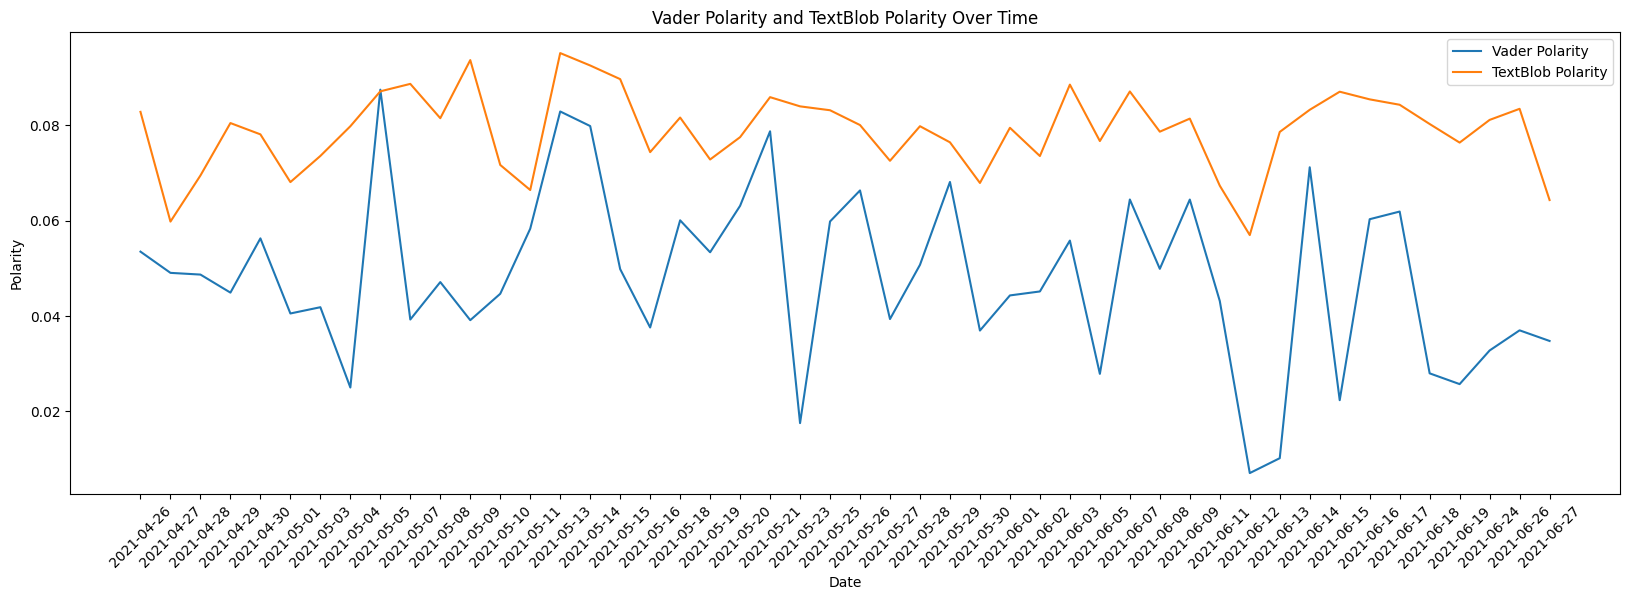

In [ ]:
# Plot a line graph for the vader polarity and textblob polarity against the different days (as you have identified earlier) in your dataset
import matplotlib.pyplot as plt
# group the dataframe by 'date' and calculate the mean polarity for each day
mean_vader_polarity = df.groupby('created_at')['vader_polarity'].mean()
mean_textblob_polarity = df.groupby('created_at')['textblob_polarity'].mean()

# create a line plot
plt.figure(figsize=(20, 6))
plt.plot(mean_vader_polarity.index, mean_vader_polarity, label='Vader Polarity')
plt.plot(mean_textblob_polarity.index, mean_textblob_polarity, label='TextBlob Polarity')

# set labels and title
plt.xlabel('Date')
plt.ylabel('Polarity')
plt.title('Vader Polarity and TextBlob Polarity Over Time')

# add legend
plt.legend()

# adjust the x-axis ticks to have a wider gap
plt.xticks(rotation=45)

# display the plot
plt.show()

In [ ]:
# Identify and display the tweets where vader and textblob output a different sentiment output. How many tweets show difference in opinion?

# identify tweets where Vader and TextBlob produce different sentiment outputs
different_sentiment_tweets = df[df['vader_polarity'] * df['textblob_polarity'] < 0]

# display the tweets where Vader and TextBlob show different sentiment
print("Tweets with Different Sentiment Opinions:")
for index, tweet in different_sentiment_tweets.iterrows():
    print("Tweet:", tweet['cleaned_text'])

# count the number of tweets that show a difference in sentiment opinion
num_different_sentiment_tweets = len(different_sentiment_tweets)
print("\nNumber of tweets with different sentiment opinion:", num_different_sentiment_tweets)

Streaming output truncated to the last 5000 lines.
Tweet: Decreases in COVID-19 Cases, Emergency Department Visits, Hospital Admissions, and Deaths Among Older Adults Following t
Tweet: Well past time for airlines to adjust their policies. if youve been vaccinated, you pose virtually
Tweet: Strengthened package of support Bring back George Orwell , he could write propaganda in Plain English COVID-19 Grea
Tweet: Decreases in COVID-19 Cases, Emergency Department Visits, Hospital Admissions, and Deaths Among Older Adults Follow
Tweet: At Venturize, we strive to deliver the latest information on key resources for small business owners during this critical
Tweet: What is going on in New Brunswick is madness From
Tweet: Subjects reported that the greatest stressor throughout most of the coronavirus and the Gaza war was political instab
Tweet: Important new research here 75 of migrants surveyed say they struggled to pay for food during the pandemic. Sadly, we know
Tweet: Please read this care